In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pytorch_train_mlp as mlp_train

# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 200
EVAL_FREQ_DEFAULT = 10

# Custom constants
N_SAMPLES = 2000
N_FEATURES = 2
N_CLASSES = 4
TRAIN_SAMPLE_RATE = 0.8

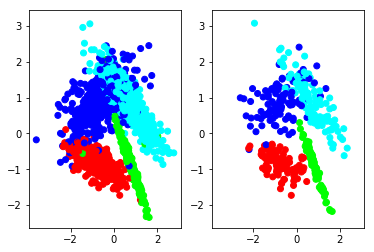

train dataset size: 1600
test dataset size: 400


In [2]:
# Get data
trainset, testset, raw_dataset = mlp_train.generate_data(N_SAMPLES, N_FEATURES, N_CLASSES)
# Dataset size
print('train dataset size: {}'.format(len(trainset)))
print('test dataset size: {}'.format(len(testset)))

In [3]:
# Pytorch version
print('PYTORCH VERSION:')
import pytorch_train_mlp as mlp_train
from pytorch_mlp import MLP

n_hidden = [int(hidden) for hidden in DNN_HIDDEN_UNITS_DEFAULT.split()]
print('Hidden nodes: ')
print(n_hidden)
torch_epochs, torch_accs, torch_losses = mlp_train.train(
    net=MLP,
    trainset=trainset,
    testset=testset,
    n_features=N_FEATURES,
    n_hidden=n_hidden,
    n_classes=N_CLASSES,
    epochs=MAX_EPOCHS_DEFAULT,
    learning_rate=LEARNING_RATE_DEFAULT,
    batch_size=256
)

PYTORCH VERSION:
Hidden nodes: 
[20]


E:\CS\Deep Learning\tutorials\assignment2\PART1\pytorch_mlp.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.softmax(x)


epoch: 10, loss: 1.999631, test acc: 0.915
epoch: 20, loss: 1.992635, test acc: 0.915
epoch: 30, loss: 1.991156, test acc: 0.9225
epoch: 40, loss: 1.979653, test acc: 0.935
epoch: 50, loss: 1.972153, test acc: 0.94
epoch: 60, loss: 1.982077, test acc: 0.94
epoch: 70, loss: 1.981742, test acc: 0.94
epoch: 80, loss: 1.97524, test acc: 0.935
epoch: 90, loss: 1.974437, test acc: 0.94
epoch: 100, loss: 1.974388, test acc: 0.9375
epoch: 110, loss: 1.975775, test acc: 0.945
epoch: 120, loss: 1.969732, test acc: 0.94
epoch: 130, loss: 1.971575, test acc: 0.9425
epoch: 140, loss: 1.978493, test acc: 0.94
epoch: 150, loss: 1.972936, test acc: 0.9425
epoch: 160, loss: 1.971779, test acc: 0.94
epoch: 170, loss: 1.971863, test acc: 0.94
epoch: 180, loss: 1.969713, test acc: 0.9425
epoch: 190, loss: 1.966368, test acc: 0.94
epoch: 200, loss: 1.968643, test acc: 0.94


In [4]:
# My version
print('MY VERSION:')
from mymlp.mymlp import MLP as myMLP
import mymlp.train_mlp_numpy as my_mlp_train
from mymlp.modules import CrossEntropy, Optimizer

# raw data
train_data, test_data, raw_train_label, raw_test_label = raw_dataset
train_label = np.zeros((len(raw_train_label), 4))
train_label[np.arange(len(raw_train_label)), raw_train_label] = 1
test_label = np.zeros((len(raw_test_label), 4))
test_label[np.arange(len(raw_test_label)), raw_test_label] = 1

# define network
hidden_units = list(map(int, DNN_HIDDEN_UNITS_DEFAULT.split(',')))
mymlp = myMLP(2, hidden_units, 4)

# define loss function and optimizer
optimizer = Optimizer(mymlp, LEARNING_RATE_DEFAULT, optimizer='RMSprop')
loss_func = CrossEntropy()

_, _, my_scores, my_losses = my_mlp_train.train(mymlp, optimizer, loss_func, train_data, train_label, test_data, test_label, 256)

MY VERSION:
epoch 10: loss: 0.239112 acc: 0.8725
epoch 20: loss: 0.180154 acc: 0.9325
epoch 30: loss: 0.183485 acc: 0.93
epoch 40: loss: 0.161866 acc: 0.945
epoch 50: loss: 0.171885 acc: 0.935
epoch 60: loss: 0.1968 acc: 0.905
epoch 70: loss: 0.183832 acc: 0.935
epoch 80: loss: 0.159971 acc: 0.9325
epoch 90: loss: 0.160301 acc: 0.9375
epoch 100: loss: 0.175063 acc: 0.935
epoch 110: loss: 0.158073 acc: 0.935
epoch 120: loss: 0.151566 acc: 0.9375
epoch 130: loss: 0.155497 acc: 0.9425
epoch 140: loss: 0.160713 acc: 0.9475
epoch 150: loss: 0.152765 acc: 0.9325
epoch 160: loss: 0.165237 acc: 0.94
epoch 170: loss: 0.15154 acc: 0.9375
epoch 180: loss: 0.165532 acc: 0.9325
epoch 190: loss: 0.181449 acc: 0.9275
epoch 200: loss: 0.182659 acc: 0.935


TORCH VERSION:


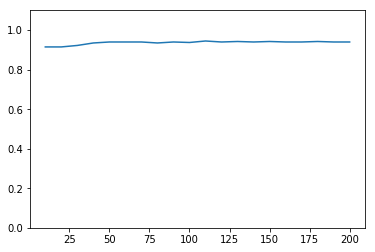

In [5]:
# accuracy curve of pytorch version
print('TORCH VERSION:')
acc_plot = plt.plot(torch_epochs, torch_accs)
plt.ylim([0, 1.1])
plt.show()
plt.close()

MY VERSION:


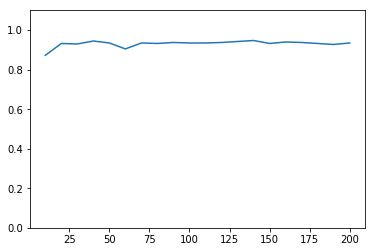

In [6]:
# accuracy curve of my version
print('MY VERSION:')
acc_plot = plt.plot(torch_epochs, my_scores)
plt.ylim([0, 1.1])
plt.show()
plt.close()

TORCH VERSION:


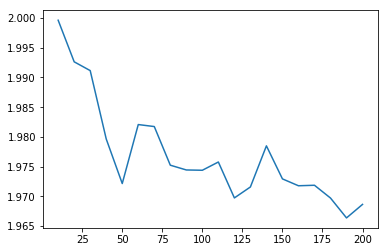

In [8]:
# loss curve of pytorch version
losses = plt.plot(torch_epochs, torch_losses)
print('TORCH VERSION:')
plt.show()
plt.close()

MY VERSION:


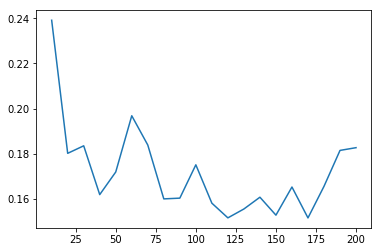

In [10]:
# loss curve of my version
losses = plt.plot(torch_epochs, my_losses)
print('MY VERSION:')
plt.show()
plt.close()

In [1]:
print('Both mlps use RMSProp optimizer and mini-batch gradient descent')
print('The curves of accuracy and loss are similar. However my mlp is much faster than pytorch')

Both mlps use RMSProp optimizer and mini-batch gradient descent
The curves of accuracy and loss are similar. However my mlp is much faster than pytorch
